In [1]:
!pip install bltk

##**Importing Libraries**


In [2]:
from sklearn.model_selection import train_test_split
from bltk.langtools import Tokenizer # BLTK: The Bengali Natural Language Processing Toolkit
from bltk.langtools import remove_stopwords
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

import collections
import nltk
import numpy as np
import pandas as pd
import codecs

In [3]:
from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)



In [4]:
print(f'Vowels: {vowels}')
print(f'Vowel signs: {vowel_signs}')
print(f'Consonants: {consonants}')
print(f'Digits: {digits}')
print(f'Operators: {operators}')
print(f'Punctuation marks: {punctuations}')
print(f'Others: {others}')

Vowels: ['অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'ঌ', 'এ', 'ঐ', 'ও', 'ঔ']
Vowel signs: ['া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ৄ', 'ে', 'ৈ', 'ো', 'ৌ']
Consonants: ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'ড়', 'ঢ়', 'য়', 'ৎ', 'ং', 'ঃ', 'ঁ']
Digits: ['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']
Operators: ['=', '+', '-', '*', '/', '%', '<', '>', '×', '÷']
Punctuation marks: ['।', ',', ';', ':', '?', '!', "'", '.', '"', '-', '[', ']', '{', '}', '(', ')', '–', '—', '―', '~']
Others: ['৳', '৺', '্', 'ঀ', 'ঽ', '#', '$']


In [5]:
INPUT_FILE = "ecommerce_dataset.txt"
stopwords_list ="stopwords.txt"

##**Dataset Preparation and Cleaning**

In [6]:
counter = collections.Counter()
tokenizer = Tokenizer()
maxlen = 0
xs, ys = [], []
bangla_stopwords = codecs.open(stopwords_list,'r',encoding='utf-8').read().split()


fin = codecs.open(INPUT_FILE, "r", encoding='utf-16')
for line in fin:
  
    _, sent = line.strip().split("\t") #Stripping the dataset based on tab. That is stripping label from sentence
    print("Label: ", _)
    print("Sentence: ",sent)

    words = tokenizer.word_tokenizer(sent)
    print("Afert Tokenizing: ",words)

    wordsExcludingPunctuationMarks=[word for word in words if word not in punctuations]
    print("Truncating punctuation:", wordsExcludingPunctuationMarks)
    
    wordsExcludingStopWords = [word.strip() for word in wordsExcludingPunctuationMarks if word not in bangla_stopwords]
    print("Truncating StopWords:", wordsExcludingStopWords)

    if len(wordsExcludingStopWords) > maxlen: #For calculating the maximum number of words in a sentence
        maxlen = len(wordsExcludingStopWords) 
    for wordExcludingStopWords in wordsExcludingStopWords:
        counter[wordExcludingStopWords] += 1 #Putting the frequency of each  word in a dictionary
    print("***************************************************************************************")

    ys.append(int(_))
    xs.append(' '.join(wordsExcludingStopWords))


fin.close()
    


Label:  0
Sentence:  অনেকগুলা অরডার আছে একটু দেখবেন
Afert Tokenizing:  ['অনেকগুলা', 'অরডার', 'আছে', 'একটু', 'দেখবেন']
Truncating punctuation: ['অনেকগুলা', 'অরডার', 'আছে', 'একটু', 'দেখবেন']
Truncating StopWords: ['অনেকগুলা', 'অরডার', 'একটু', 'দেখবেন']
***************************************************************************************
Label:  1
Sentence:  ভালোবাসা রইল ইভ্যালির প্রতি
Afert Tokenizing:  ['ভালোবাসা', 'রইল', 'ইভ্যালির', 'প্রতি']
Truncating punctuation: ['ভালোবাসা', 'রইল', 'ইভ্যালির', 'প্রতি']
Truncating StopWords: ['ভালোবাসা', 'রইল', 'ইভ্যালির']
***************************************************************************************
Label:  0
Sentence:  আগের প্রডাক্ট ক্লিয়ার করেন তারাতাড়ি
Afert Tokenizing:  ['আগের', 'প্রডাক্ট', 'ক্লিয়ার', 'করেন', 'তারাতাড়ি']
Truncating punctuation: ['আগের', 'প্রডাক্ট', 'ক্লিয়ার', 'করেন', 'তারাতাড়ি']
Truncating StopWords: ['আগের', 'প্রডাক্ট', 'ক্লিয়ার', 'তারাতাড়ি']
***************************************************************************

Afert Tokenizing:  ['এটা', 'হাস্যকর', 'ব্যাপার', 'এখনো', 'আপনারা', 'অফার', 'দিচ্ছেন']
Truncating punctuation: ['এটা', 'হাস্যকর', 'ব্যাপার', 'এখনো', 'আপনারা', 'অফার', 'দিচ্ছেন']
Truncating StopWords: ['হাস্যকর', 'ব্যাপার', 'এখনো', 'আপনারা', 'অফার', 'দিচ্ছেন']
***************************************************************************************
Label:  0
Sentence:  ভাওতাবাজী এখনো ছাড়বা না?
Afert Tokenizing:  ['ভাওতাবাজী', 'এখনো', 'ছাড়বা', 'না', '?']
Truncating punctuation: ['ভাওতাবাজী', 'এখনো', 'ছাড়বা', 'না']
Truncating StopWords: ['ভাওতাবাজী', 'এখনো', 'ছাড়বা', 'না']
***************************************************************************************
Label:  1
Sentence:  নাহ এইবার ঠিক আছে
Afert Tokenizing:  ['নাহ', 'এইবার', 'ঠিক', 'আছে']
Truncating punctuation: ['নাহ', 'এইবার', 'ঠিক', 'আছে']
Truncating StopWords: ['নাহ', 'এইবার', 'ঠিক']
***************************************************************************************
Label:  0
Sentence:  মামলা আমিও করবো আমার চার লাখ টাকা যদি ন

Afert Tokenizing:  ['আলহামদুলিল্লাহ', '', ',', 'এখন', 'দিনে', 'দিনে', 'পাচ্ছি', '।']
Truncating punctuation: ['আলহামদুলিল্লাহ', '', 'এখন', 'দিনে', 'দিনে', 'পাচ্ছি']
Truncating StopWords: ['আলহামদুলিল্লাহ', '', 'দিনে', 'দিনে', 'পাচ্ছি']
***************************************************************************************
Label:  1
Sentence:  আলহামদুলিল্লাহ আজ আলেশা মার্ট এর বাইক ভেলিভারি পাইলাম।
Afert Tokenizing:  ['আলহামদুলিল্লাহ', 'আজ', 'আলেশা', 'মার্ট', 'এর', 'বাইক', 'ভেলিভারি', 'পাইলাম', '।']
Truncating punctuation: ['আলহামদুলিল্লাহ', 'আজ', 'আলেশা', 'মার্ট', 'এর', 'বাইক', 'ভেলিভারি', 'পাইলাম']
Truncating StopWords: ['আলহামদুলিল্লাহ', 'আলেশা', 'মার্ট', 'বাইক', 'ভেলিভারি', 'পাইলাম']
***************************************************************************************
Label:  1
Sentence:  সাবাস আলেশা মাট
Afert Tokenizing:  ['সাবাস', 'আলেশা', 'মাট']
Truncating punctuation: ['সাবাস', 'আলেশা', 'মাট']
Truncating StopWords: ['সাবাস', 'আলেশা', 'মাট']
*************************************

Truncating punctuation: ['অনলাইনে', 'এই', 'প্রথম', 'কিছু', 'নেওয়া', 'হলো', 'ভয়টা', 'কেটে', 'গেল', 'ধন্যবাদ', '']
Truncating StopWords: ['অনলাইনে', 'ভয়টা', 'কেটে', 'ধন্যবাদ', '']
***************************************************************************************
Label:  0
Sentence:  ঈদের দিন বাটার ভাউচার অর্ডার দিয়েছিলাম, ৪৮ ঘন্টার মধ্যে ডেলিভারি দেয়ার কথা ছিল কিন্তু এখনো তো পেলাম না
Afert Tokenizing:  ['ঈদের', 'দিন', 'বাটার', 'ভাউচার', 'অর্ডার', 'দিয়েছিলাম', ',', '৪৮', 'ঘন্টার', 'মধ্যে', 'ডেলিভারি', 'দেয়ার', 'কথা', 'ছিল', 'কিন্তু', 'এখনো', 'তো', 'পেলাম', 'না']
Truncating punctuation: ['ঈদের', 'দিন', 'বাটার', 'ভাউচার', 'অর্ডার', 'দিয়েছিলাম', '৪৮', 'ঘন্টার', 'মধ্যে', 'ডেলিভারি', 'দেয়ার', 'কথা', 'ছিল', 'কিন্তু', 'এখনো', 'তো', 'পেলাম', 'না']
Truncating StopWords: ['ঈদের', 'বাটার', 'ভাউচার', 'অর্ডার', 'দিয়েছিলাম', '৪৮', 'ঘন্টার', 'ডেলিভারি', 'দেয়ার', 'কথা', 'এখনো', 'পেলাম', 'না']
***************************************************************************************
Label:  1
Sentence: 

Truncating StopWords: ['দুইটা', 'প্যান্ট', 'অর্ডার', 'করেছি', 'দুইটা', 'প্যান্টই', 'যথেষ্ট', 'ভালো', 'হয়েছে,মাপ', 'একুরেট', 'হয়েছে', 'ধন্যবাদ', 'আপনাদেরকে']
***************************************************************************************
Label:  1
Sentence:  এত কম মূল্যে এতো কোয়ালিটি সম্পন্ন ভালো প্রোডাক্ট সত্যিই প্রত্যাশার অধিক। সেইসাথে দ্রুতগতির ডেলিভারি,প্যাকেজিং ও স্টাফদের ব্যাবহারে সত্যিই আমি মুগ্ধ
Afert Tokenizing:  ['এত', 'কম', 'মূল্যে', 'এতো', 'কোয়ালিটি', 'সম্পন্ন', 'ভালো', 'প্রোডাক্ট', 'সত্যিই', 'প্রত্যাশার', 'অধিক', '।', 'সেইসাথে', 'দ্রুতগতির', 'ডেলিভারি,প্যাকেজিং', 'ও', 'স্টাফদের', 'ব্যাবহারে', 'সত্যিই', 'আমি', 'মুগ্ধ']
Truncating punctuation: ['এত', 'কম', 'মূল্যে', 'এতো', 'কোয়ালিটি', 'সম্পন্ন', 'ভালো', 'প্রোডাক্ট', 'সত্যিই', 'প্রত্যাশার', 'অধিক', 'সেইসাথে', 'দ্রুতগতির', 'ডেলিভারি,প্যাকেজিং', 'ও', 'স্টাফদের', 'ব্যাবহারে', 'সত্যিই', 'আমি', 'মুগ্ধ']
Truncating StopWords: ['কম', 'মূল্যে', 'এতো', 'কোয়ালিটি', 'সম্পন্ন', 'ভালো', 'প্রোডাক্ট', 'সত্যিই', 'প্রত্যাশার', 'অধিক',

***************************************************************************************
Label:  0
Sentence:  এই মাস্ক গুলো যদি একটা ৫০ টাকা হয় তাহলে আপনারা টাকা বেশি নিচ্ছেন বলে মনে হয় না আপনাদের কাছে ।এইটা কোন ধরনের প্রতারণা।
Afert Tokenizing:  ['এই', 'মাস্ক', 'গুলো', 'যদি', 'একটা', '৫০', 'টাকা', 'হয়', 'তাহলে', 'আপনারা', 'টাকা', 'বেশি', 'নিচ্ছেন', 'বলে', 'মনে', 'হয়', 'না', 'আপনাদের', 'কাছে', 'এইটা', '।', 'কোন', 'ধরনের', 'প্রতারণা', '।']
Truncating punctuation: ['এই', 'মাস্ক', 'গুলো', 'যদি', 'একটা', '৫০', 'টাকা', 'হয়', 'তাহলে', 'আপনারা', 'টাকা', 'বেশি', 'নিচ্ছেন', 'বলে', 'মনে', 'হয়', 'না', 'আপনাদের', 'কাছে', 'এইটা', 'কোন', 'ধরনের', 'প্রতারণা']
Truncating StopWords: ['মাস্ক', 'গুলো', 'একটা', '৫০', 'টাকা', 'আপনারা', 'টাকা', 'বেশি', 'নিচ্ছেন', 'না', 'আপনাদের', 'এইটা', 'ধরনের', 'প্রতারণা']
***************************************************************************************
Label:  1
Sentence:  এ রকম সবগুলা ওয়েবসাইট যদি প্রডাক্ট সাপ্লাই দিত তাহলে আমরা কাষ্টমার যারা অনলাইনে ওর্ডার করে বার

Sentence:  আমি গত তিন বছর ধরে তাদের কাছ থেকেই নিচ্ছি। আলহামদুলিল্লাহ, তাদের সার্ভিসে আমি সন্তুষ্ট।
Afert Tokenizing:  ['আমি', 'গত', 'তিন', 'বছর', 'ধরে', 'তাদের', 'কাছ', 'থেকেই', 'নিচ্ছি', '।', 'আলহামদুলিল্লাহ', ',', 'তাদের', 'সার্ভিসে', 'আমি', 'সন্তুষ্ট', '।']
Truncating punctuation: ['আমি', 'গত', 'তিন', 'বছর', 'ধরে', 'তাদের', 'কাছ', 'থেকেই', 'নিচ্ছি', 'আলহামদুলিল্লাহ', 'তাদের', 'সার্ভিসে', 'আমি', 'সন্তুষ্ট']
Truncating StopWords: ['গত', 'তিন', 'বছর', 'নিচ্ছি', 'আলহামদুলিল্লাহ', 'সার্ভিসে', 'সন্তুষ্ট']
***************************************************************************************
Label:  1
Sentence:  নির্ভেজাল আর নির্ভরযোগ্য সেবা পেয়ে যাচ্ছি।
Afert Tokenizing:  ['নির্ভেজাল', 'আর', 'নির্ভরযোগ্য', 'সেবা', 'পেয়ে', 'যাচ্ছি', '।']
Truncating punctuation: ['নির্ভেজাল', 'আর', 'নির্ভরযোগ্য', 'সেবা', 'পেয়ে', 'যাচ্ছি']
Truncating StopWords: ['নির্ভেজাল', 'নির্ভরযোগ্য', 'সেবা', 'পেয়ে', 'যাচ্ছি']
***************************************************************************************
Label

Truncating StopWords: ['আকর্ষণীয়', 'ছবি', 'দেখিয়ে', 'নকল', '/', 'নিন্ম', 'মানের', 'পণ্য', 'সরবরাহ']
***************************************************************************************
Label:  0
Sentence:  সেলার পণ্য আপলোডের সময় ওজন ভুল দিয়েছেন(গ্রাম ভেবে কেজিতে দিয়েছেন)।
Afert Tokenizing:  ['সেলার', 'পণ্য', 'আপলোডের', 'সময়', 'ওজন', 'ভুল', 'দিয়েছেন(গ্রাম', 'ভেবে', 'কেজিতে', 'দিয়েছেন)', '।']
Truncating punctuation: ['সেলার', 'পণ্য', 'আপলোডের', 'সময়', 'ওজন', 'ভুল', 'দিয়েছেন(গ্রাম', 'ভেবে', 'কেজিতে', 'দিয়েছেন)']
Truncating StopWords: ['সেলার', 'পণ্য', 'আপলোডের', 'সময়', 'ওজন', 'ভুল', 'দিয়েছেন(গ্রাম', 'ভেবে', 'কেজিতে', 'দিয়েছেন)']
***************************************************************************************
Label:  0
Sentence:  ওরে চিটার
Afert Tokenizing:  ['ওরে', 'চিটার']
Truncating punctuation: ['ওরে', 'চিটার']
Truncating StopWords: ['ওরে', 'চিটার']
***************************************************************************************
Label:  0
Sentence:  বাটপারি করেও অনায়াস

Truncating StopWords: ['প্যাকেজিংটা', 'সুন্দর']
***************************************************************************************
Label:  1
Sentence:  ধন্যবাদ এতো সুন্দর একটা প্রডাক্ট দেয়ার জন্য।
Afert Tokenizing:  ['ধন্যবাদ', 'এতো', 'সুন্দর', 'একটা', 'প্রডাক্ট', 'দেয়ার', 'জন্য', '।']
Truncating punctuation: ['ধন্যবাদ', 'এতো', 'সুন্দর', 'একটা', 'প্রডাক্ট', 'দেয়ার', 'জন্য']
Truncating StopWords: ['ধন্যবাদ', 'এতো', 'সুন্দর', 'একটা', 'প্রডাক্ট', 'দেয়ার']
***************************************************************************************
Label:  1
Sentence:  উনাদের ব্যবহার অত্যন্ত ভাল। শুভ কামনা রইলো আপনাদের জন্য।
Afert Tokenizing:  ['উনাদের', 'ব্যবহার', 'অত্যন্ত', 'ভাল', '।', 'শুভ', 'কামনা', 'রইলো', 'আপনাদের', 'জন্য', '।']
Truncating punctuation: ['উনাদের', 'ব্যবহার', 'অত্যন্ত', 'ভাল', 'শুভ', 'কামনা', 'রইলো', 'আপনাদের', 'জন্য']
Truncating StopWords: ['উনাদের', 'অত্যন্ত', 'ভাল', 'শুভ', 'কামনা', 'রইলো', 'আপনাদের']
*******************************************************************

Truncating punctuation: ['ডেলিভারি', 'ম্যান', 'ভাল', 'ছিলনা']
Truncating StopWords: ['ডেলিভারি', 'ম্যান', 'ভাল', 'ছিলনা']
***************************************************************************************
Label:  1
Sentence:  বা গেঞ্জিটা খুব সুন্দর তো
Afert Tokenizing:  ['বা', 'গেঞ্জিটা', 'খুব', 'সুন্দর', 'তো']
Truncating punctuation: ['বা', 'গেঞ্জিটা', 'খুব', 'সুন্দর', 'তো']
Truncating StopWords: ['গেঞ্জিটা', 'সুন্দর']
***************************************************************************************
Label:  1
Sentence:  এক্সক্লুসিভ কালেকশন
Afert Tokenizing:  ['এক্সক্লুসিভ', 'কালেকশন']
Truncating punctuation: ['এক্সক্লুসিভ', 'কালেকশন']
Truncating StopWords: ['এক্সক্লুসিভ', 'কালেকশন']
***************************************************************************************
Label:  0
Sentence:  অর্ডার করেছি তিন দিন আগে এখনো হাতে পায়নি
Afert Tokenizing:  ['অর্ডার', 'করেছি', 'তিন', 'দিন', 'আগে', 'এখনো', 'হাতে', 'পায়নি']
Truncating punctuation: ['অর্ডার', 'করেছি', 'তিন', 'দিন', '

Truncating punctuation: ['ইজির', 'প্রোডাক্ট', 'ভালো', 'না', 'ফালতু']
Truncating StopWords: ['ইজির', 'প্রোডাক্ট', 'ভালো', 'না', 'ফালতু']
***************************************************************************************
Label:  0
Sentence:  ভাই শার্ট এর কালার ১ মাসের মধ্যেই নষ্ট হয়ে যায় কেন
Afert Tokenizing:  ['ভাই', 'শার্ট', 'এর', 'কালার', '১', 'মাসের', 'মধ্যেই', 'নষ্ট', 'হয়ে', 'যায়', 'কেন']
Truncating punctuation: ['ভাই', 'শার্ট', 'এর', 'কালার', '১', 'মাসের', 'মধ্যেই', 'নষ্ট', 'হয়ে', 'যায়', 'কেন']
Truncating StopWords: ['ভাই', 'শার্ট', 'কালার', '১', 'মাসের', 'নষ্ট', 'হয়ে', 'যায়']
***************************************************************************************
Label:  1
Sentence:  শার্টটা কিন্তু হেব্বি সুন্দর
Afert Tokenizing:  ['শার্টটা', 'কিন্তু', 'হেব্বি', 'সুন্দর']
Truncating punctuation: ['শার্টটা', 'কিন্তু', 'হেব্বি', 'সুন্দর']
Truncating StopWords: ['শার্টটা', 'হেব্বি', 'সুন্দর']
***************************************************************************************


Sentence:  কেবল ভাল, সাথে টেস্টার ফ্রি দিছে। ধন্যবাদ
Afert Tokenizing:  ['কেবল', 'ভাল', ',', 'সাথে', 'টেস্টার', 'ফ্রি', 'দিছে', '।', 'ধন্যবাদ']
Truncating punctuation: ['কেবল', 'ভাল', 'সাথে', 'টেস্টার', 'ফ্রি', 'দিছে', 'ধন্যবাদ']
Truncating StopWords: ['কেবল', 'ভাল', 'সাথে', 'টেস্টার', 'ফ্রি', 'দিছে', 'ধন্যবাদ']
***************************************************************************************
Label:  0
Sentence:  ফালতু প্রোডাক্ট! ৭০ টাকার ১২ ভোল্ট মোটরের বাতাস এর চেয়ে অনেক বেশি!
Afert Tokenizing:  ['ফালতু', 'প্রোডাক্ট', '!', '৭০', 'টাকার', '১২', 'ভোল্ট', 'মোটরের', 'বাতাস', 'এর', 'চেয়ে', 'অনেক', 'বেশি', '!']
Truncating punctuation: ['ফালতু', 'প্রোডাক্ট', '৭০', 'টাকার', '১২', 'ভোল্ট', 'মোটরের', 'বাতাস', 'এর', 'চেয়ে', 'অনেক', 'বেশি']
Truncating StopWords: ['ফালতু', 'প্রোডাক্ট', '৭০', 'টাকার', '১২', 'ভোল্ট', 'মোটরের', 'বাতাস', 'চেয়ে', 'বেশি']
***************************************************************************************
Label:  1
Sentence:  ফ্যানটার স্পীড বেশ ভালই। ছোট ফ্যান

Truncating punctuation: ['চাইলাম', 'কি', 'আর', 'পাইলাম', 'কি', 'খুব', 'খারাপ', 'একটা', 'অভিজ্ঞতা']
Truncating StopWords: ['চাইলাম', 'পাইলাম', 'খারাপ', 'একটা', 'অভিজ্ঞতা']
***************************************************************************************
Label:  0
Sentence:  আমি যে কালার দিয়েছি সেটা পাই নাই সাইজ টাও টিক না
Afert Tokenizing:  ['আমি', 'যে', 'কালার', 'দিয়েছি', 'সেটা', 'পাই', 'নাই', 'সাইজ', 'টাও', 'টিক', 'না']
Truncating punctuation: ['আমি', 'যে', 'কালার', 'দিয়েছি', 'সেটা', 'পাই', 'নাই', 'সাইজ', 'টাও', 'টিক', 'না']
Truncating StopWords: ['কালার', 'দিয়েছি', 'পাই', 'নাই', 'সাইজ', 'টাও', 'টিক', 'না']
***************************************************************************************
Label:  0
Sentence:  দিলাম সাদা সোল আর সাদা ফিতার আর আসলো পুরা কালো। এটা কোনো কথা হ্যা। পুরাই পালতু
Afert Tokenizing:  ['দিলাম', 'সাদা', 'সোল', 'আর', 'সাদা', 'ফিতার', 'আর', 'আসলো', 'পুরা', 'কালো', '।', 'এটা', 'কোনো', 'কথা', 'হ্যা', '।', 'পুরাই', 'পালতু']
Truncating punctuation: ['দিলাম', '

Label:  1
Sentence:  এই তাওয়াল টি অনেক ভালো বিশেষ করে গাড়ি মোছার জন্য।
Afert Tokenizing:  ['এই', 'তাওয়াল', 'টি', 'অনেক', 'ভালো', 'বিশেষ', 'করে', 'গাড়ি', 'মোছার', 'জন্য', '।']
Truncating punctuation: ['এই', 'তাওয়াল', 'টি', 'অনেক', 'ভালো', 'বিশেষ', 'করে', 'গাড়ি', 'মোছার', 'জন্য']
Truncating StopWords: ['তাওয়াল', 'ভালো', 'বিশেষ', 'গাড়ি', 'মোছার']
***************************************************************************************
Label:  0
Sentence:  "একদম বাজে মাল খুভই পাতলা এবং কোয়ালিটি খারাপ"
Afert Tokenizing:  ['একদম', '"', 'বাজে', 'মাল', 'খুভই', 'পাতলা', 'এবং', 'কোয়ালিটি', 'খারাপ', '"']
Truncating punctuation: ['একদম', 'বাজে', 'মাল', 'খুভই', 'পাতলা', 'এবং', 'কোয়ালিটি', 'খারাপ']
Truncating StopWords: ['একদম', 'বাজে', 'মাল', 'খুভই', 'পাতলা', 'কোয়ালিটি', 'খারাপ']
***************************************************************************************
Label:  0
Sentence:  ভালো কিন্তু অন্য কালার ডেলিভারি দিছে
Afert Tokenizing:  ['ভালো', 'কিন্তু', 'অন্য', 'কালার', 'ডেলিভারি', 'দিছে']
Tru

Truncating StopWords: ['দীর্ঘ', 'মাস', 'রিভিউ', 'শেয়ার', 'করলাম', 'ভালমানের', 'একটা', 'প্রোডাক্ট']
***************************************************************************************
Label:  0
Sentence:  প্রাপ্ত পণ্য কিন্তু নিম্নমানের এবং ত্রুটিপূর্ণ 5 পিস সেটের মধ্যে 2 জোড়া
Afert Tokenizing:  ['প্রাপ্ত', 'পণ্য', 'কিন্তু', 'নিম্নমানের', 'এবং', 'ত্রুটিপূর্ণ', '5', 'পিস', 'সেটের', 'মধ্যে', '2', 'জোড়া']
Truncating punctuation: ['প্রাপ্ত', 'পণ্য', 'কিন্তু', 'নিম্নমানের', 'এবং', 'ত্রুটিপূর্ণ', '5', 'পিস', 'সেটের', 'মধ্যে', '2', 'জোড়া']
Truncating StopWords: ['প্রাপ্ত', 'পণ্য', 'নিম্নমানের', 'ত্রুটিপূর্ণ', '5', 'পিস', 'সেটের', '2', 'জোড়া']
***************************************************************************************
Label:  1
Sentence:  দাম হিসাবে অনেক সুন্দর হয়েছে অনেক ভালো প্যাকিং ও ভালো ছিল সবদিক থেকে ভালো আছে আপনারা নিতে পারেন।
Afert Tokenizing:  ['দাম', 'হিসাবে', 'অনেক', 'সুন্দর', 'হয়েছে', 'অনেক', 'ভালো', 'প্যাকিং', 'ও', 'ভালো', 'ছিল', 'সবদিক', 'থেকে', 'ভালো', 'আছে'

Label:  0
Sentence:  কিন্তু প্রডাক্ট ডেলিভারি জঘন্য
Afert Tokenizing:  ['কিন্তু', 'প্রডাক্ট', 'ডেলিভারি', 'জঘন্য']
Truncating punctuation: ['কিন্তু', 'প্রডাক্ট', 'ডেলিভারি', 'জঘন্য']
Truncating StopWords: ['প্রডাক্ট', 'ডেলিভারি', 'জঘন্য']
***************************************************************************************
Label:  0
Sentence:  " তারা প্রডাক্ট ডিলা মেরে মেরে রাখে, প্যাকেজ ছিড়েবিড়ে শেষ"
Afert Tokenizing:  ['', '"', 'তারা', 'প্রডাক্ট', 'ডিলা', 'মেরে', 'মেরে', 'রাখে', ',', 'প্যাকেজ', 'ছিড়েবিড়ে', 'শেষ', '"']
Truncating punctuation: ['', 'তারা', 'প্রডাক্ট', 'ডিলা', 'মেরে', 'মেরে', 'রাখে', 'প্যাকেজ', 'ছিড়েবিড়ে', 'শেষ']
Truncating StopWords: ['', 'প্রডাক্ট', 'ডিলা', 'মেরে', 'মেরে', 'রাখে', 'প্যাকেজ', 'ছিড়েবিড়ে', 'শেষ']
***************************************************************************************
Label:  0
Sentence:  "১৫ টা অর্ডার করেছিলাম, ১১ টা দিয়েছে বাকিগুলা যদি না থাকে, তাহলে টাকা ফেরত দিয়ে দিন"
Afert Tokenizing:  ['১৫', '"', 'টা', 'অর্ডার', 'করেছিলাম', ',', '১

Label:  0
Sentence:  অনেক রকম ট্রাই করেছি কিন্তু আর চলে না
Afert Tokenizing:  ['অনেক', 'রকম', 'ট্রাই', 'করেছি', 'কিন্তু', 'আর', 'চলে', 'না']
Truncating punctuation: ['অনেক', 'রকম', 'ট্রাই', 'করেছি', 'কিন্তু', 'আর', 'চলে', 'না']
Truncating StopWords: ['ট্রাই', 'করেছি', 'না']
***************************************************************************************
Label:  0
Sentence:  একদম বাজে প্রোডাক্ট
Afert Tokenizing:  ['একদম', 'বাজে', 'প্রোডাক্ট']
Truncating punctuation: ['একদম', 'বাজে', 'প্রোডাক্ট']
Truncating StopWords: ['একদম', 'বাজে', 'প্রোডাক্ট']
***************************************************************************************
Label:  0
Sentence:  কফির কাপে দিলে আর ঘুরতে পারে না
Afert Tokenizing:  ['কফির', 'কাপে', 'দিলে', 'আর', 'ঘুরতে', 'পারে', 'না']
Truncating punctuation: ['কফির', 'কাপে', 'দিলে', 'আর', 'ঘুরতে', 'পারে', 'না']
Truncating StopWords: ['কফির', 'কাপে', 'দিলে', 'ঘুরতে', 'না']
***************************************************************************************

Label:  0
Sentence:  এই অর্ডার ডেলিভারির কোন খবর নাই। নিজে থেকে ফেইলড এ্যাটেম্পট দেখাইলো। সব খেয়াল খুশি মত করতেসে।
Afert Tokenizing:  ['এই', 'অর্ডার', 'ডেলিভারির', 'কোন', 'খবর', 'নাই', '।', 'নিজে', 'থেকে', 'ফেইলড', 'এ্যাটেম্পট', 'দেখাইলো', '।', 'সব', 'খেয়াল', 'খুশি', 'মত', 'করতেসে', '।']
Truncating punctuation: ['এই', 'অর্ডার', 'ডেলিভারির', 'কোন', 'খবর', 'নাই', 'নিজে', 'থেকে', 'ফেইলড', 'এ্যাটেম্পট', 'দেখাইলো', 'সব', 'খেয়াল', 'খুশি', 'মত', 'করতেসে']
Truncating StopWords: ['অর্ডার', 'ডেলিভারির', 'খবর', 'নাই', 'ফেইলড', 'এ্যাটেম্পট', 'দেখাইলো', 'খেয়াল', 'খুশি', 'মত', 'করতেসে']
***************************************************************************************
Label:  0
Sentence:  দারাজ ডেলিভারি চার্জ অতিরিক্ত বেশি নেওয়া হচ্ছে বর্তমানে
Afert Tokenizing:  ['দারাজ', 'ডেলিভারি', 'চার্জ', 'অতিরিক্ত', 'বেশি', 'নেওয়া', 'হচ্ছে', 'বর্তমানে']
Truncating punctuation: ['দারাজ', 'ডেলিভারি', 'চার্জ', 'অতিরিক্ত', 'বেশি', 'নেওয়া', 'হচ্ছে', 'বর্তমানে']
Truncating StopWords: ['দারাজ', 'ডেলিভারি', 'চা

***************************************************************************************
Label:  0
Sentence:  আপনাদের ডেলিভারি চার্জ কমান রেগুলার ক্রেতা ছিলাম
Afert Tokenizing:  ['আপনাদের', 'ডেলিভারি', 'চার্জ', 'কমান', 'রেগুলার', 'ক্রেতা', 'ছিলাম']
Truncating punctuation: ['আপনাদের', 'ডেলিভারি', 'চার্জ', 'কমান', 'রেগুলার', 'ক্রেতা', 'ছিলাম']
Truncating StopWords: ['আপনাদের', 'ডেলিভারি', 'চার্জ', 'কমান', 'রেগুলার', 'ক্রেতা', 'ছিলাম']
***************************************************************************************
Label:  0
Sentence:  ১০ দিনে ফ্রিজ পেলাম না। জানানো হয় না দিবে নাকি। আর যদি কিছু অর্ডার করছি
Afert Tokenizing:  ['১০', 'দিনে', 'ফ্রিজ', 'পেলাম', 'না', '।', 'জানানো', 'হয়', 'না', 'দিবে', 'নাকি', '।', 'আর', 'যদি', 'কিছু', 'অর্ডার', 'করছি']
Truncating punctuation: ['১০', 'দিনে', 'ফ্রিজ', 'পেলাম', 'না', 'জানানো', 'হয়', 'না', 'দিবে', 'নাকি', 'আর', 'যদি', 'কিছু', 'অর্ডার', 'করছি']
Truncating StopWords: ['১০', 'দিনে', 'ফ্রিজ', 'পেলাম', 'না', 'না', 'দিবে', 'অর্ডার', 'করছি']
*****

Truncating StopWords: ['যতসব', 'ফালতু', 'একটা', 'চাইলে', 'আরেক', 'টা', 'দেয়']
***************************************************************************************
Label:  0
Sentence:  বাটপারেরা আমার ৪১৪টাকা কই?খারাপ মাল দিয়ে মানুষের টাকা মেরে দেওয়াকে বিজনেস বলে না এটাকে বলে বাটপারি।
Afert Tokenizing:  ['বাটপারেরা', 'আমার', '৪১৪টাকা', 'কই?খারাপ', 'মাল', 'দিয়ে', 'মানুষের', 'টাকা', 'মেরে', 'দেওয়াকে', 'বিজনেস', 'বলে', 'না', 'এটাকে', 'বলে', 'বাটপারি', '।']
Truncating punctuation: ['বাটপারেরা', 'আমার', '৪১৪টাকা', 'কই?খারাপ', 'মাল', 'দিয়ে', 'মানুষের', 'টাকা', 'মেরে', 'দেওয়াকে', 'বিজনেস', 'বলে', 'না', 'এটাকে', 'বলে', 'বাটপারি']
Truncating StopWords: ['বাটপারেরা', '৪১৪টাকা', 'কই?খারাপ', 'মাল', 'দিয়ে', 'মানুষের', 'টাকা', 'মেরে', 'দেওয়াকে', 'বিজনেস', 'না', 'এটাকে', 'বাটপারি']
***************************************************************************************
Label:  0
Sentence:  এটার কোনো সমাধান পাচ্ছি না
Afert Tokenizing:  ['এটার', 'কোনো', 'সমাধান', 'পাচ্ছি', 'না']
Truncating punctuation:

***************************************************************************************
Label:  0
Sentence:  ১০০০ টাকার পেমেন্ট করছি কিন্তু কুপন পায়নি
Afert Tokenizing:  ['১০০০', 'টাকার', 'পেমেন্ট', 'করছি', 'কিন্তু', 'কুপন', 'পায়নি']
Truncating punctuation: ['১০০০', 'টাকার', 'পেমেন্ট', 'করছি', 'কিন্তু', 'কুপন', 'পায়নি']
Truncating StopWords: ['১০০০', 'টাকার', 'পেমেন্ট', 'করছি', 'কুপন', 'পায়নি']
***************************************************************************************
Label:  1
Sentence:  গোল্ডেন রোজ ব্র্যান্ড এর প্রতিটা প্রডাক্ট অনেক ভালো। আমি নিজে ব্যবহার করি।
Afert Tokenizing:  ['গোল্ডেন', 'রোজ', 'ব্র্যান্ড', 'এর', 'প্রতিটা', 'প্রডাক্ট', 'অনেক', 'ভালো', '।', 'আমি', 'নিজে', 'ব্যবহার', 'করি', '।']
Truncating punctuation: ['গোল্ডেন', 'রোজ', 'ব্র্যান্ড', 'এর', 'প্রতিটা', 'প্রডাক্ট', 'অনেক', 'ভালো', 'আমি', 'নিজে', 'ব্যবহার', 'করি']
Truncating StopWords: ['গোল্ডেন', 'রোজ', 'ব্র্যান্ড', 'প্রতিটা', 'প্রডাক্ট', 'ভালো']
************************************************************

Truncating punctuation: ['অসাধারণ', 'মানের', 'খাবার', '....']
Truncating StopWords: ['অসাধারণ', 'মানের', 'খাবার', '....']
***************************************************************************************
Label:  1
Sentence:  চমত্কার খাদ্য
Afert Tokenizing:  ['চমত্কার', 'খাদ্য']
Truncating punctuation: ['চমত্কার', 'খাদ্য']
Truncating StopWords: ['চমত্কার', 'খাদ্য']
***************************************************************************************
Label:  1
Sentence:  ভাল খাদ্য এবং অসাধারণ সেবা
Afert Tokenizing:  ['ভাল', 'খাদ্য', 'এবং', 'অসাধারণ', 'সেবা']
Truncating punctuation: ['ভাল', 'খাদ্য', 'এবং', 'অসাধারণ', 'সেবা']
Truncating StopWords: ['ভাল', 'খাদ্য', 'অসাধারণ', 'সেবা']
***************************************************************************************
Label:  1
Sentence:  "মানসম্মত খাদ্য, অসাধারণ পরিবেশ এবং সর্বোত্তম সেবা"
Afert Tokenizing:  ['মানসম্মত', '"', 'খাদ্য', ',', 'অসাধারণ', 'পরিবেশ', 'এবং', 'সর্বোত্তম', 'সেবা', '"']
Truncating punctuation: ['মানসম্মত', '

Label:  1
Sentence:  চমৎকার খাদ্য
Afert Tokenizing:  ['চমৎকার', 'খাদ্য']
Truncating punctuation: ['চমৎকার', 'খাদ্য']
Truncating StopWords: ['চমৎকার', 'খাদ্য']
***************************************************************************************
Label:  0
Sentence:  শুরু থেকে শেষ পর্যন্ত সার্ভিস ভালো ছিল না
Afert Tokenizing:  ['শুরু', 'থেকে', 'শেষ', 'পর্যন্ত', 'সার্ভিস', 'ভালো', 'ছিল', 'না']
Truncating punctuation: ['শুরু', 'থেকে', 'শেষ', 'পর্যন্ত', 'সার্ভিস', 'ভালো', 'ছিল', 'না']
Truncating StopWords: ['শেষ', 'সার্ভিস', 'ভালো', 'না']
***************************************************************************************
Label:  0
Sentence:  খুবই অপেশাদার এবং অভদ্র
Afert Tokenizing:  ['খুবই', 'অপেশাদার', 'এবং', 'অভদ্র']
Truncating punctuation: ['খুবই', 'অপেশাদার', 'এবং', 'অভদ্র']
Truncating StopWords: ['খুবই', 'অপেশাদার', 'অভদ্র']
***************************************************************************************
Label:  0
Sentence:  খাবারটা ভয়ংকর ছিল
Afert Tokenizing:  ['খাবারটা

In [7]:
xs

['অনেকগুলা অরডার একটু দেখবেন',
 'ভালোবাসা রইল ইভ্যালির',
 'আগের প্রডাক্ট ক্লিয়ার তারাতাড়ি',
 'ভাল লাগতেছে না',
 'দয়া একটু ভাই পাবো',
 'সঠিক তারিখে দিতেন অভিযোগ দিত না',
 'কমার্সের নামে আপনারা মানুষের সাথে করতেছে একদিন হিসাব আপনাদের কড়ায় ঘন্ডায়',
 'ফাইজলামি!!',
 'দীর্ঘ হায়াত কামনা',
 'ভাই অডার মত টাকা নাই স্বপ্নের খুবই প্রয়োজনীয় বাইকটা পাব না',
 'ভাই সামান্য গ্রোসারি আইটেম পারলেন না ৩ মাসে',
 'যুবকের স্বপ্ন বেঁচে পুরণ',
 'কথা মিল রাখলে গ্রাহক বারবে না কমবে আশা দ্রুত সমাদান ধন্যবাদ',
 'ভাই পন্য গুলো পাবো,,,,,',
 'Daraz মাসেই না কিনেছি বড় ছোট অর্ডার',
 'প্রডাক্ট গুলো পাওয়ার সম্ভাবনা ভাই',
 'খবর বার্তা নাই তাড়াতাড়ি ডেলিভারি দেন..',
 'আপনারা কখনো মানুষের আস্থা অর্জন পারবেন না ১০০%!!',
 'কাষ্টমারের ভোগান্তি কমিয়ে কথা অনুযায়ী করারও পরামর্শ রইলো',
 'ওয়াদা দিবেন না যেটা রক্ষা পারবেন না ধন্যবাদ',
 'সততা ব্যবসা সফলতা আসবে ',
 'ভালো ভালো রাখবেন গ্রাহক দের',
 'বেস্ট অব লাক',
 'এগিয়ে যাক ইভেলি আগামীর পথে স্বপ্ন পূরনে',
 'বাকি অর্ডার গুলো দেরি একটু দেওয়ার অনুরোধ করতেছি',
 'অর্ডার আসতে পারছে না যথাস

##**TF-IDF**

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25, random_state=0)
Xtrain

['খুবি বাজে কোয়ালিটি ভাই ডিজাইন ভালো লাগছিল কিনছিলাম দাম দিয়েও বাট পুরাই বাজে',
 '"আলহামদুলিল্লাহ যেটা ওর্ডার করছি পাইছি।অল্প দামে খুবই ভালো একটা প্রোডাক্ট',
 'মাসে ৫/৬ ডেলিভারি ম্যান আসতো প্রডাক্ট ডেলিভারি দিতে,,এখন এক এক বারও আসে না,,কারণ ডেলিভারি চার্জ বাড়ানোর অর্ডারই না',
 'ভালো লেগেছে',
 'এক আরেক ৷ চিটিং',
 'খারাপ অভিজ্ঞতা',
 'দুইটা নিয়েছি সুন্দর',
 'হাইলি রিকমেন্ডড',
 'রমজানের টি-শার্ট দাম ৪৯৫ টাকা ঈদের বেড়ে ৫৯৫ টাকা সবচেয়ে বড় কথা এক সপ্তার কালার',
 'ধন্যবাদ ভাল মানের কাপড়',
 'স্নোবল ফেয়ারি লাইটস টা সত্যিই অসম্ভব সুন্দর কোয়ালিটি ফুল প্রতিটি লাইট ঠিক',
 'শুধু ধোঁকা বাজি',
 'পণ্যের দাম বেশি দেখিয়ে তারপরে ডিসকাউন্ট দেয়া একটা শুভঙ্করের ফাঁকি',
 'বছর পাব না',
 'কোয়ালিটি এভারেজ সেলাইগুলো দুর্বল ব্যাগটা সুন্দর বাচ্চাদের সাথে মানানসই ভারী না বহন বুদ্ধিমানের',
 'ওয়েবসাইট বন্ধ',
 'জিনিস পাব',
 'খারাপ মানের খাবার',
 'জঘন্য বার্গার সত্যি টাকাই লস',
 'দোকানের পরিষেবা অত্যন্ত সন্তুষ্ট',
 'আলহামদুলিল্লাহ প্রোডাক্ট ভাল ছিলাম ঠিক তেমনই পেয়েছি',
 'হতাশ কেনার সীমা সীমাবদ্ধ অর্ডার পারছি না',


In [9]:
tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
Xtrain_tf = tfidf.fit_transform(Xtrain)
print("n_samples: %d, n_features: %d" % Xtrain_tf.shape)


n_samples: 1223, n_features: 12988


In [10]:
#transforming test data into tf-idf matrix
Xtest_tf = tfidf.transform(Xtest)
print("n_samples: %d, n_features: %d" % Xtest_tf.shape)



n_samples: 408, n_features: 12988


##**Naive Bayes**

In [11]:
#naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(Xtrain_tf, Ytrain)
#predicted y
y_pred = naive_bayes_classifier.predict(Xtest_tf)

[[167  37]
 [ 13 191]]
0.8774509803921569
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       204
           1       0.84      0.94      0.88       204

    accuracy                           0.88       408
   macro avg       0.88      0.88      0.88       408
weighted avg       0.88      0.88      0.88       408



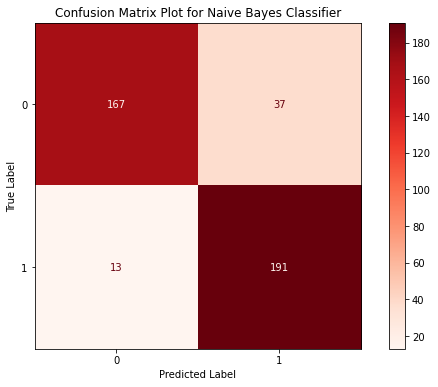

In [12]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(naive_bayes_classifier , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Naive Bayes Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [13]:
fprNB, tprNB, thresholdsNB = metrics.roc_curve(Ytest,y_pred)

##**Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression
LRClassification=LogisticRegression()
LRClassification.fit(Xtrain_tf, Ytrain)
y_pred=LRClassification.predict(Xtest_tf)


[[165  39]
 [ 13 191]]
0.8725490196078431
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       204
           1       0.83      0.94      0.88       204

    accuracy                           0.87       408
   macro avg       0.88      0.87      0.87       408
weighted avg       0.88      0.87      0.87       408



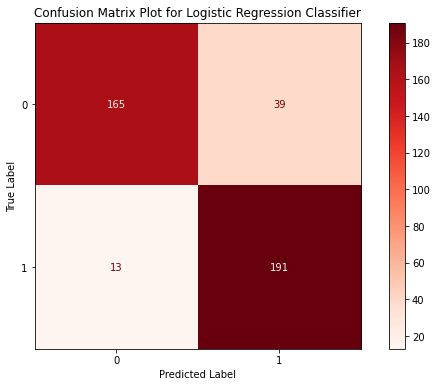

In [15]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))
matrix = plot_confusion_matrix(LRClassification , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Logistic Regression Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [16]:
fprLR, tprLR, thresholdsLR = metrics.roc_curve(Ytest,y_pred)

##**Decision Tree**

In [17]:
from sklearn.tree import DecisionTreeClassifier
DTClassification=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTClassification.fit(Xtrain_tf, Ytrain)
y_pred=DTClassification.predict(Xtest_tf)

[[187  17]
 [ 47 157]]
0.8431372549019608
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       204
           1       0.90      0.77      0.83       204

    accuracy                           0.84       408
   macro avg       0.85      0.84      0.84       408
weighted avg       0.85      0.84      0.84       408



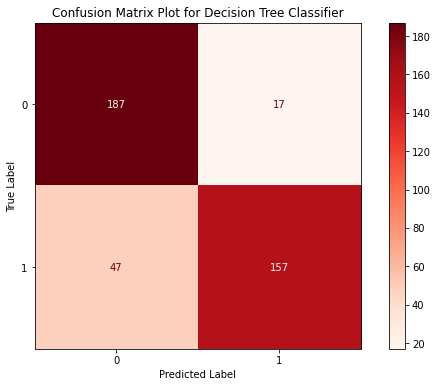

In [18]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(DTClassification , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Decision Tree Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [19]:
fprDT, tprDT, thresholdsDT = metrics.roc_curve(Ytest,y_pred)

##**SVM**

In [20]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(Xtrain_tf, Ytrain)
#Predict the response for test dataset
y_pred = clf.predict(Xtest_tf)

[[179  25]
 [ 14 190]]
0.9044117647058824
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       204
           1       0.88      0.93      0.91       204

    accuracy                           0.90       408
   macro avg       0.91      0.90      0.90       408
weighted avg       0.91      0.90      0.90       408



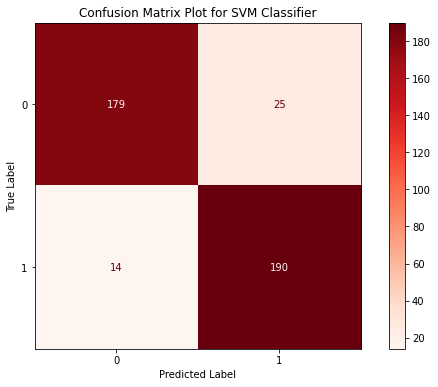

In [21]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(clf , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for SVM Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [22]:
fprSVM, tprSVM, thresholdsSVM = metrics.roc_curve(Ytest,y_pred)

##**Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0).fit(Xtrain_tf, Ytrain)
y_pred=rf_classifier.predict(Xtest_tf)

[[149  55]
 [ 13 191]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       204
           1       0.78      0.94      0.85       204

    accuracy                           0.83       408
   macro avg       0.85      0.83      0.83       408
weighted avg       0.85      0.83      0.83       408



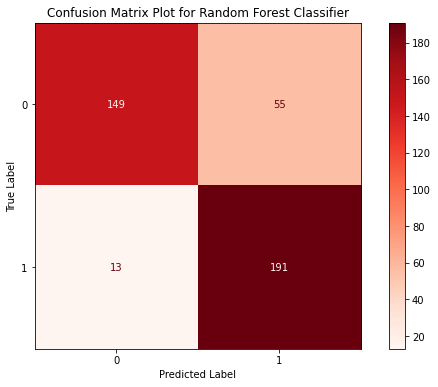

In [24]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(rf_classifier, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Random Forest Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [25]:
fprRF, tprRF, thresholdsRF = metrics.roc_curve(Ytest,y_pred)

##**SGD**

In [26]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss = 'log',penalty='l2', max_iter=10,random_state=0).fit(Xtrain_tf, Ytrain)
y_pred=sgd_classifier.predict(Xtest_tf)

[[177  27]
 [ 16 188]]
0.8946078431372549
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       204
           1       0.87      0.92      0.90       204

    accuracy                           0.89       408
   macro avg       0.90      0.89      0.89       408
weighted avg       0.90      0.89      0.89       408



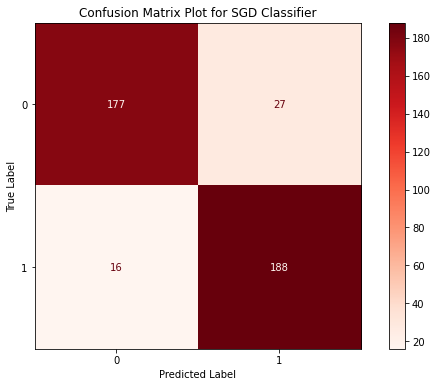

In [27]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(sgd_classifier, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for SGD Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [28]:
fprSGD, tprSGD, thresholdsSGD = metrics.roc_curve(Ytest,y_pred)

##**RandomizedSearchCV**

In [29]:
svm_clf = svm.SVC(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)
 
# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1),
             'kernel': ['rbf']}
              
rand_search = RandomizedSearchCV(svm_clf , param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(Xtrain_tf, Ytrain) 
rand_search.cv_results_
rand_predictions = rand_search.predict(Xtest_tf)
  

[[180  24]
 [ 14 190]]
0.9068627450980392
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       204
           1       0.89      0.93      0.91       204

    accuracy                           0.91       408
   macro avg       0.91      0.91      0.91       408
weighted avg       0.91      0.91      0.91       408



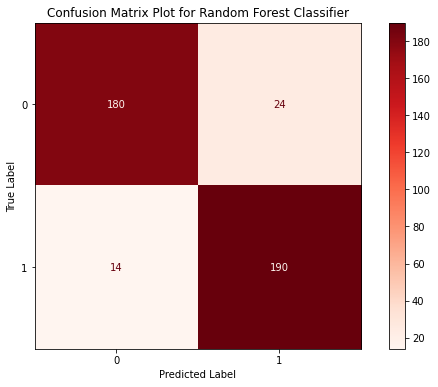

In [30]:
print(confusion_matrix(Ytest,rand_predictions))
print(accuracy_score(Ytest,rand_predictions))
print(classification_report(Ytest,rand_predictions))
matrix = plot_confusion_matrix(rand_search, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Random Forest Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [31]:
fprSVM_optimized, tprSVM_optimized, thresholds_optimized = metrics.roc_curve(Ytest,y_pred)

##**ROC**

<Figure size 432x288 with 0 Axes>

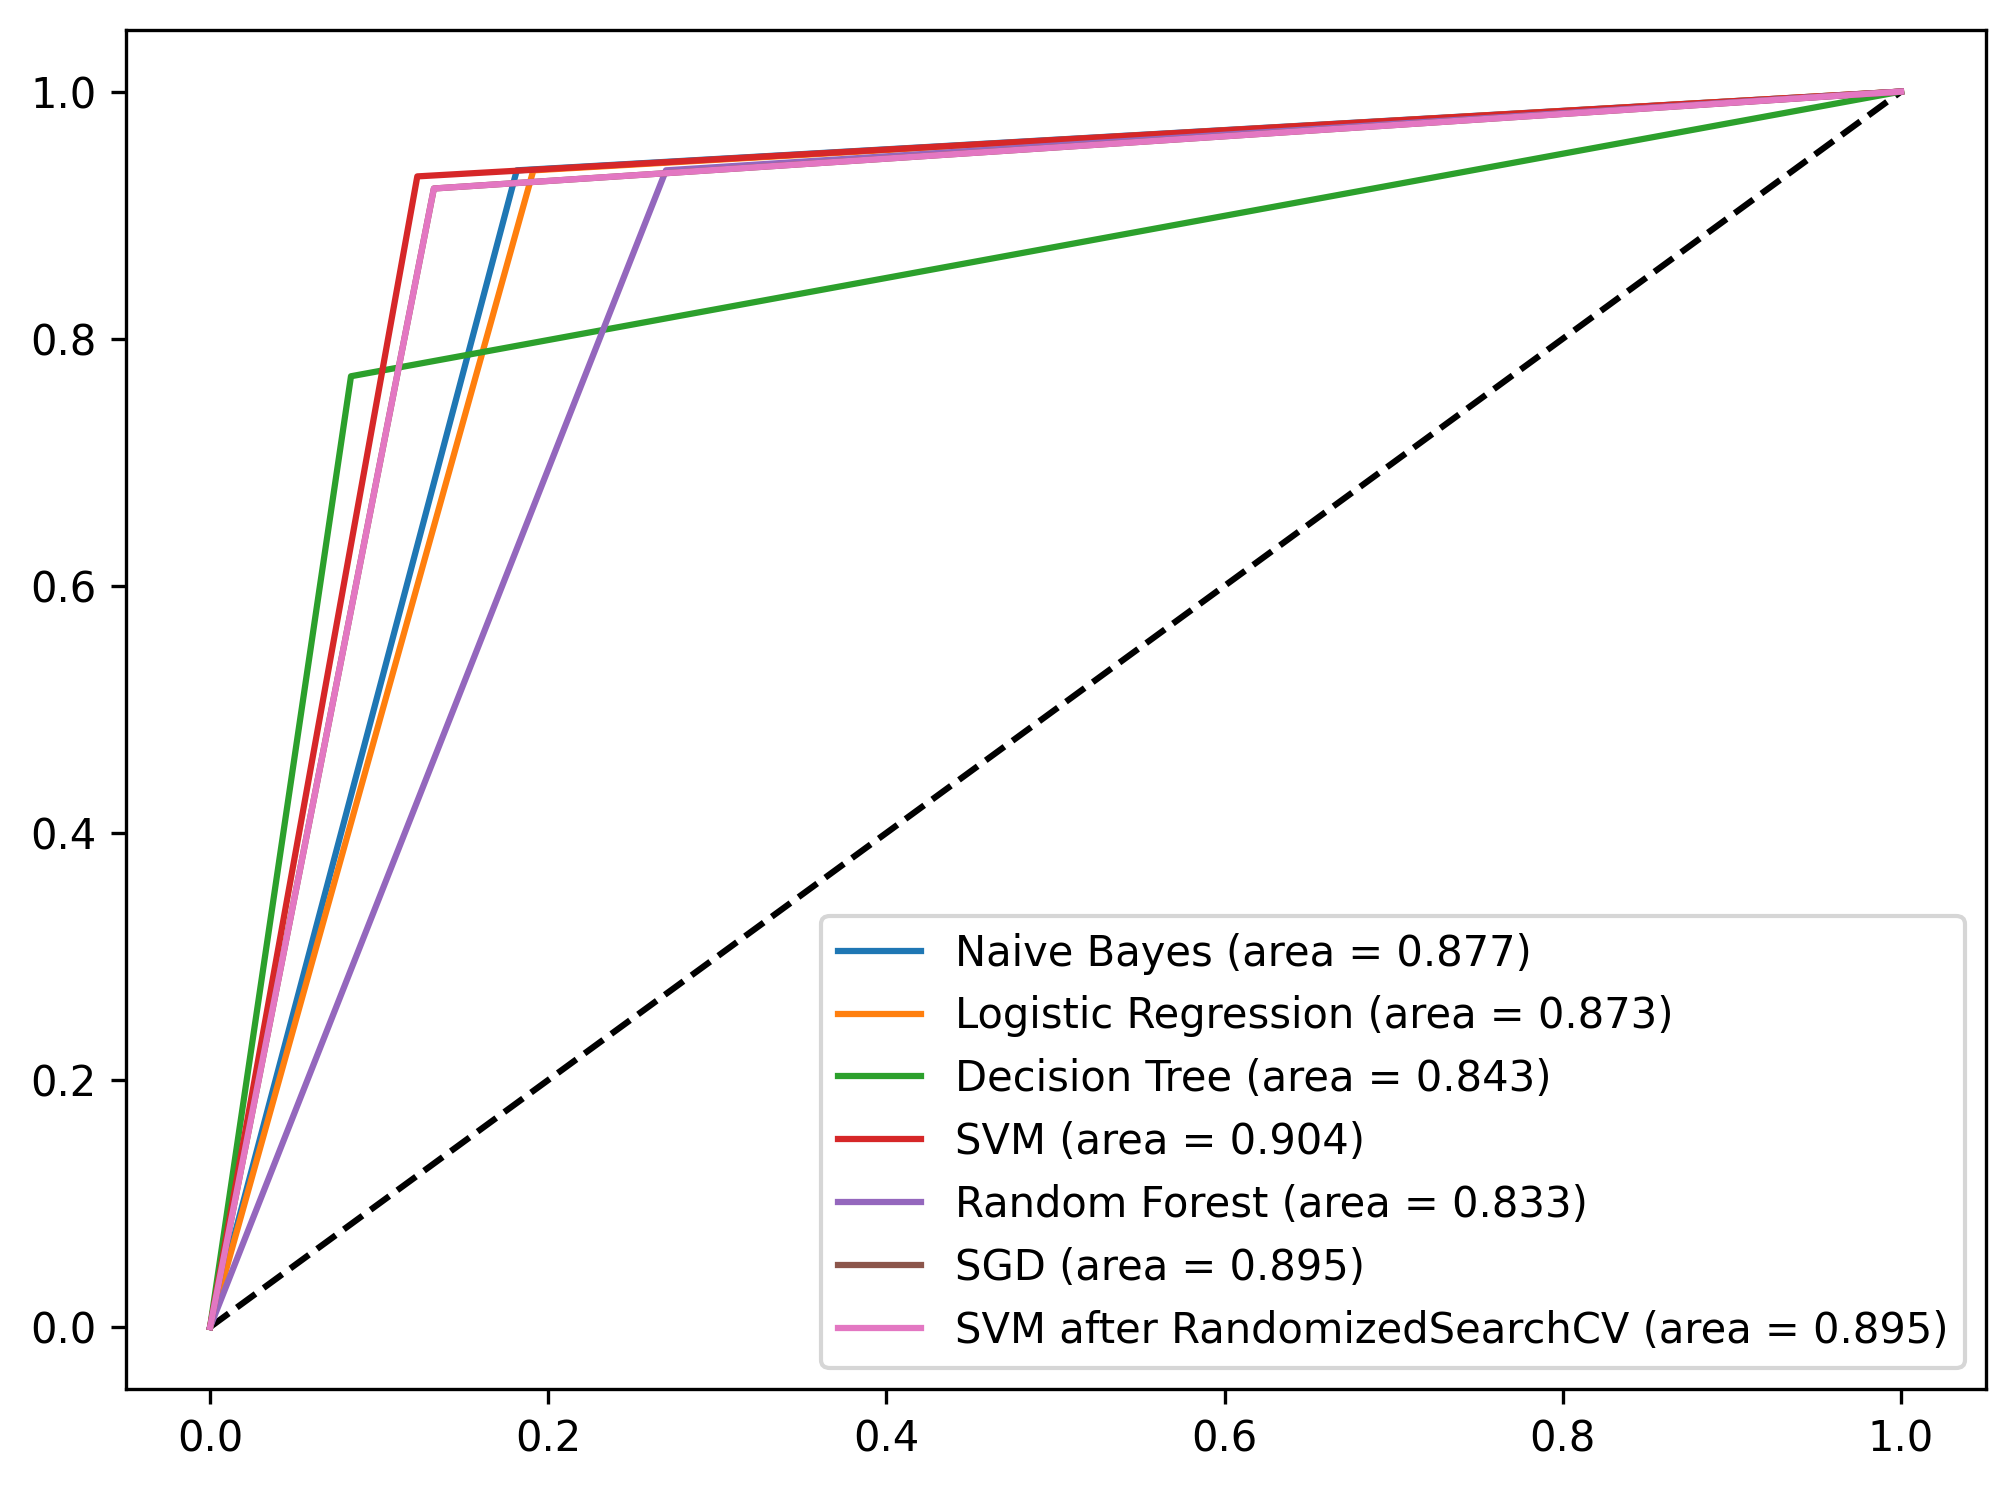

In [32]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

plt.figure(1)
plt.figure(figsize=(8, 6), dpi=300)
plt.plot([0, 1], [0, 1], 'k--')

auc_NB = auc(fprNB, tprNB)
auc_LR = auc(fprLR, tprLR)
auc_DT = auc(fprDT , tprDT)
auc_SVM = auc(fprSVM, tprSVM)
auc_RF = auc(fprRF, tprRF)
auc_SGD = auc(fprSGD, tprSGD)
auc_SVM_optimized = auc(fprSVM_optimized, tprSVM_optimized)

plt.plot(fprNB, tprNB, label='Naive Bayes (area = {:.3f})'.format(auc_NB))
plt.plot(fprLR, tprLR, label='Logistic Regression (area = {:.3f})'.format(auc_LR))
plt.plot(fprDT, tprDT, label='Decision Tree (area = {:.3f})'.format(auc_DT))
plt.plot(fprSVM, tprSVM, label='SVM (area = {:.3f})'.format(auc_SVM))
plt.plot(fprRF, tprRF, label='Random Forest (area = {:.3f})'.format(auc_RF))
plt.plot(fprSGD, tprSGD, label='SGD (area = {:.3f})'.format(auc_SGD))
plt.plot(fprSVM_optimized, tprSVM_optimized, label='SVM after RandomizedSearchCV (area = {:.3f})'.format(auc_SVM_optimized))


plt.legend(loc='lower right')
plt.show()